In [1]:
import mat73
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data_dict_female = mat73.loadmat("./data/Emotrans1_girl_data_preprocessed.mat", use_attrdict=True)
arr_f = np.array(data_dict_female["All_Feature"])

In [3]:
data_dict = mat73.loadmat("./data/Emotrans1_Boy_data_preprocessed.mat", use_attrdict=True)
arr_m = np.array(data_dict["All_Feature"])

In [4]:
#retrive pos or neg return np 
def get_pos_or_neg(data,position):
    arr = []
    index = 0
    for i in range(data.shape[0]):
        temp = []
        for j in position:
            for k in data[i][j[0]][j[1]]:
                temp.append(k)
        arr.append(temp)
    return np.array(arr)

In [5]:
# select frequenceis and (0-4s -> 0 or 0.5-4.5s -> 1)
def get_selected(data=None,freq = None, sec=None):
    if freq:
        data = np.delete(data,freq,axis=3)
    if sec == 0:
        return np.delete(data, 0, axis=4)
    elif sec == 1:
        return np.delete(data,1,axis=4)
    else:
        print('sec not specified')
        return data 

In [6]:
# female data combined 
pos = [[0,0],[0,1],[1,2],[1,3],[2,0],[2,1],[2,2],[2,3]]
neg = [[0,2],[0,3],[1,0],[1,1],[3,0],[3,1],[3,2],[3,3]]

pos_df_f = get_pos_or_neg(arr_f,pos)
neg_df_f = get_pos_or_neg(arr_f,neg)

pos_df_f=get_selected(pos_df_f,sec=0).reshape(15,96,128,8)
neg_df_f = get_selected(neg_df_f,sec=0).reshape(15,96,128,8)
raw_data_f = np.concatenate((pos_df_f,neg_df_f),axis=1).reshape(15,192,128*8)
y_f = np.concatenate((np.ones((15,96)),np.zeros((15,96))),axis=1)


In [10]:
pos_df_m = get_pos_or_neg(arr_m,pos)
neg_df_m = get_pos_or_neg(arr_m,neg)
pos_df_m = get_selected(pos_df_m,sec=0).reshape(18,96,128,8)
neg_df_m = get_selected(neg_df_m,sec=0).reshape(18,96,128,8)
raw_data_m = np.concatenate((pos_df_m,neg_df_m),axis=1).reshape(18,192,128*8)
y_m = np.concatenate((np.ones((18,96)),np.zeros((18,96))),axis=1)


In [19]:
raw_data = np.append(raw_data_f,raw_data_m,axis=0)
y = np.append(y_f,y_m,axis=0)
print(raw_data.shape)
print(y.shape)
# print(y.shape)

(33, 192, 1024)
(33, 192)


In [22]:
iter = 0
alphas = [0.1,0.01,0.001]
coefs = []
for a in alphas:
    # ,max_iter=int(1e6)
    model = LogisticRegression(C=a, penalty='l1',max_iter=500,solver='saga')
    iter = 0
    train_scores=[]
    test_scores = []
    for i in range(32):
        display(iter)
        iter+=1
        x_train,x_test = np.concatenate((raw_data[:i],raw_data[i+1:])).reshape(32*192,1024),raw_data[i].reshape(192,1024)
        y_train,y_test = np.concatenate((y[:i],y[i+1:])).reshape(32*192),y[i].reshape(192)
        x_train,y_train = shuffle(x_train,y_train)
        model.fit(x_train, y_train)
        # training loss
        pred_train_lasso= model.predict(x_train)
        temp = accuracy_score(y_train,pred_train_lasso)
        display("training accuracy: ",temp)
        train_scores.append(temp)

        #testing 
        pred_test_lasso= model.predict(x_test)
        temp = accuracy_score(y_test,pred_test_lasso)
        display("testing accuracy: ",temp)
        test_scores.append(temp)
        
        coefs = model.coef_
    with open('comb_with_acc'+str(a)+".txt",'w') as f:
        f.write("accuracy - training")
        f.write(str(train_scores))
        f.write("\n accuracy - testing")
        f.write(str(test_scores))

        f.write("\ncoefs ")
        for c in coefs[0]:
            f.write(str(c)+",")
    print(train_scores)
    print(test_scores)
    print(coefs)

0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61474609375

'testing accuracy: '

0.5625

1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6150716145833334

'testing accuracy: '

0.59375

2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6170247395833334

'testing accuracy: '

0.5208333333333334

3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61376953125

'testing accuracy: '

0.5520833333333334

4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6170247395833334

'testing accuracy: '

0.5677083333333334

5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6181640625

'testing accuracy: '

0.5104166666666666

6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6139322916666666

'testing accuracy: '

0.484375

7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6153971354166666

'testing accuracy: '

0.5520833333333334

8

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6173502604166666

'testing accuracy: '

0.5625

9

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6140950520833334

'testing accuracy: '

0.5104166666666666

10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6139322916666666

'testing accuracy: '

0.5364583333333334

11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61376953125

'testing accuracy: '

0.5833333333333334

12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61572265625

'testing accuracy: '

0.546875

13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6150716145833334

'testing accuracy: '

0.5520833333333334

14

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6111653645833334

'testing accuracy: '

0.6354166666666666

15

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6121419270833334

'testing accuracy: '

0.6770833333333334

16

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6158854166666666

'testing accuracy: '

0.5989583333333334

17

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6092122395833334

'testing accuracy: '

0.5677083333333334

18

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6129557291666666

'testing accuracy: '

0.53125

19

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61279296875

'testing accuracy: '

0.578125

20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6145833333333334

'testing accuracy: '

0.5833333333333334

21

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6103515625

'testing accuracy: '

0.6770833333333334

22

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6142578125

'testing accuracy: '

0.5625

23

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6153971354166666

'testing accuracy: '

0.5208333333333334

24

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6110026041666666

'testing accuracy: '

0.6145833333333334

25

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61279296875

'testing accuracy: '

0.53125

26

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6140950520833334

'testing accuracy: '

0.6145833333333334

27

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.61474609375

'testing accuracy: '

0.53125

28

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6140950520833334

'testing accuracy: '

0.5729166666666666

29

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6136067708333334

'testing accuracy: '

0.484375

30

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6126302083333334

'testing accuracy: '

0.5572916666666666

31

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6145833333333334

'testing accuracy: '

0.6302083333333334

[0.61474609375, 0.6150716145833334, 0.6170247395833334, 0.61376953125, 0.6170247395833334, 0.6181640625, 0.6139322916666666, 0.6153971354166666, 0.6173502604166666, 0.6140950520833334, 0.6139322916666666, 0.61376953125, 0.61572265625, 0.6150716145833334, 0.6111653645833334, 0.6121419270833334, 0.6158854166666666, 0.6092122395833334, 0.6129557291666666, 0.61279296875, 0.6145833333333334, 0.6103515625, 0.6142578125, 0.6153971354166666, 0.6110026041666666, 0.61279296875, 0.6140950520833334, 0.61474609375, 0.6140950520833334, 0.6136067708333334, 0.6126302083333334, 0.6145833333333334]
[0.5625, 0.59375, 0.5208333333333334, 0.5520833333333334, 0.5677083333333334, 0.5104166666666666, 0.484375, 0.5520833333333334, 0.5625, 0.5104166666666666, 0.5364583333333334, 0.5833333333333334, 0.546875, 0.5520833333333334, 0.6354166666666666, 0.6770833333333334, 0.5989583333333334, 0.5677083333333334, 0.53125, 0.578125, 0.5833333333333334, 0.6770833333333334, 0.5625, 0.5208333333333334, 0.6145833333333334,

0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5997721354166666

'testing accuracy: '

0.5364583333333334

1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6005859375

'testing accuracy: '

0.5625

2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.60595703125

'testing accuracy: '

0.5052083333333334

3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5974934895833334

'testing accuracy: '

0.5729166666666666

4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6025390625

'testing accuracy: '

0.5572916666666666

5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6028645833333334

'testing accuracy: '

0.53125

6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6023763020833334

'testing accuracy: '

0.484375

7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6002604166666666

'testing accuracy: '

0.515625

8

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.599609375

'testing accuracy: '

0.5833333333333334

9

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6051432291666666

'testing accuracy: '

0.5364583333333334

10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6022135416666666

'testing accuracy: '

0.5416666666666666

11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6018880208333334

'testing accuracy: '

0.5885416666666666

12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.60302734375

'testing accuracy: '

0.5260416666666666

13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6002604166666666

'testing accuracy: '

0.5364583333333334

14

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.59619140625

'testing accuracy: '

0.5989583333333334

15

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.599609375

'testing accuracy: '

0.6770833333333334

16

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5999348958333334

'testing accuracy: '

0.6145833333333334

17

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.60107421875

'testing accuracy: '

0.546875

18

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6041666666666666

'testing accuracy: '

0.5208333333333334

19

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.60107421875

'testing accuracy: '

0.5729166666666666

20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6015625

'testing accuracy: '

0.5833333333333334

21

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5997721354166666

'testing accuracy: '

0.6614583333333334

22

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6028645833333334

'testing accuracy: '

0.546875

23

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6070963541666666

'testing accuracy: '

0.515625

24

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6005859375

'testing accuracy: '

0.6302083333333334

25

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6013997395833334

'testing accuracy: '

0.5416666666666666

26

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.603515625

'testing accuracy: '

0.609375

27

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5992838541666666

'testing accuracy: '

0.5729166666666666

28

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6033528645833334

'testing accuracy: '

0.5625

29

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6051432291666666

'testing accuracy: '

0.4947916666666667

30

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.60107421875

'testing accuracy: '

0.5677083333333334

31

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.6007486979166666

'testing accuracy: '

0.6302083333333334

[0.5997721354166666, 0.6005859375, 0.60595703125, 0.5974934895833334, 0.6025390625, 0.6028645833333334, 0.6023763020833334, 0.6002604166666666, 0.599609375, 0.6051432291666666, 0.6022135416666666, 0.6018880208333334, 0.60302734375, 0.6002604166666666, 0.59619140625, 0.599609375, 0.5999348958333334, 0.60107421875, 0.6041666666666666, 0.60107421875, 0.6015625, 0.5997721354166666, 0.6028645833333334, 0.6070963541666666, 0.6005859375, 0.6013997395833334, 0.603515625, 0.5992838541666666, 0.6033528645833334, 0.6051432291666666, 0.60107421875, 0.6007486979166666]
[0.5364583333333334, 0.5625, 0.5052083333333334, 0.5729166666666666, 0.5572916666666666, 0.53125, 0.484375, 0.515625, 0.5833333333333334, 0.5364583333333334, 0.5416666666666666, 0.5885416666666666, 0.5260416666666666, 0.5364583333333334, 0.5989583333333334, 0.6770833333333334, 0.6145833333333334, 0.546875, 0.5208333333333334, 0.5729166666666666, 0.5833333333333334, 0.6614583333333334, 0.546875, 0.515625, 0.6302083333333334, 0.5416666

0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5276692708333334

'testing accuracy: '

0.5

1

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5349934895833334

'testing accuracy: '

0.4947916666666667

2

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5305989583333334

'testing accuracy: '

0.5

3

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5301106770833334

'testing accuracy: '

0.5

4

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5299479166666666

'testing accuracy: '

0.5

5

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5270182291666666

'testing accuracy: '

0.5

6

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5286458333333334

'testing accuracy: '

0.5052083333333334

7

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5309244791666666

'testing accuracy: '

0.5

8

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.529296875

'testing accuracy: '

0.5

9

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.53076171875

'testing accuracy: '

0.5

10

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5286458333333334

'testing accuracy: '

0.5

11

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5305989583333334

'testing accuracy: '

0.4895833333333333

12

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5314127604166666

'testing accuracy: '

0.5

13

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5310872395833334

'testing accuracy: '

0.5

14

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5345052083333334

'testing accuracy: '

0.5

15

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5042317708333334

'testing accuracy: '

0.5052083333333334

16

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5237630208333334

'testing accuracy: '

0.6197916666666666

17

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5221354166666666

'testing accuracy: '

0.5833333333333334

18

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5262044270833334

'testing accuracy: '

0.5729166666666666

19

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5182291666666666

'testing accuracy: '

0.5

20

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5240885416666666

'testing accuracy: '

0.6145833333333334

21

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5211588541666666

'testing accuracy: '

0.5052083333333334

22

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5305989583333334

'testing accuracy: '

0.515625

23

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5275065104166666

'testing accuracy: '

0.5416666666666666

24

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5167643229166666

'testing accuracy: '

0.5

25

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5296223958333334

'testing accuracy: '

0.5

26

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.52880859375

'testing accuracy: '

0.53125

27

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5154622395833334

'testing accuracy: '

0.5

28

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5224609375

'testing accuracy: '

0.515625

29

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.52783203125

'testing accuracy: '

0.5104166666666666

30

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5211588541666666

'testing accuracy: '

0.5052083333333334

31

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


'training accuracy: '

0.5231119791666666

'testing accuracy: '

0.6354166666666666

[0.5276692708333334, 0.5349934895833334, 0.5305989583333334, 0.5301106770833334, 0.5299479166666666, 0.5270182291666666, 0.5286458333333334, 0.5309244791666666, 0.529296875, 0.53076171875, 0.5286458333333334, 0.5305989583333334, 0.5314127604166666, 0.5310872395833334, 0.5345052083333334, 0.5042317708333334, 0.5237630208333334, 0.5221354166666666, 0.5262044270833334, 0.5182291666666666, 0.5240885416666666, 0.5211588541666666, 0.5305989583333334, 0.5275065104166666, 0.5167643229166666, 0.5296223958333334, 0.52880859375, 0.5154622395833334, 0.5224609375, 0.52783203125, 0.5211588541666666, 0.5231119791666666]
[0.5, 0.4947916666666667, 0.5, 0.5, 0.5, 0.5, 0.5052083333333334, 0.5, 0.5, 0.5, 0.5, 0.4895833333333333, 0.5, 0.5, 0.5, 0.5052083333333334, 0.6197916666666666, 0.5833333333333334, 0.5729166666666666, 0.5, 0.6145833333333334, 0.5052083333333334, 0.515625, 0.5416666666666666, 0.5, 0.5, 0.53125, 0.5, 0.515625, 0.5104166666666666, 0.5052083333333334, 0.6354166666666666]
[[0. 0. 0. ... 0.

In [26]:
temp =[0.5, 0.4947916666666667, 0.5, 0.5, 0.5, 0.5, 0.5052083333333334, 0.5, 0.5, 0.5, 0.5, 0.4895833333333333, 0.5, 0.5, 0.5, 0.5052083333333334, 0.6197916666666666, 0.5833333333333334, 0.5729166666666666, 0.5, 0.6145833333333334, 0.5052083333333334, 0.515625, 0.5416666666666666, 0.5, 0.5, 0.53125, 0.5, 0.515625, 0.5104166666666666, 0.5052083333333334, 0.6354166666666666]
sum(temp)/len(temp)

0.5201822916666666

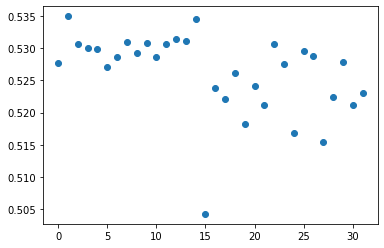

In [33]:
import matplotlib.pyplot as plt
acc = [0.5276692708333334, 0.5349934895833334, 0.5305989583333334, 0.5301106770833334, 0.5299479166666666, 0.5270182291666666, 0.5286458333333334, 0.5309244791666666, 0.529296875, 0.53076171875, 0.5286458333333334, 0.5305989583333334, 0.5314127604166666, 0.5310872395833334, 0.5345052083333334, 0.5042317708333334, 0.5237630208333334, 0.5221354166666666, 0.5262044270833334, 0.5182291666666666, 0.5240885416666666, 0.5211588541666666, 0.5305989583333334, 0.5275065104166666, 0.5167643229166666, 0.5296223958333334, 0.52880859375, 0.5154622395833334, 0.5224609375, 0.52783203125, 0.5211588541666666, 0.5231119791666666]
plt.scatter(range(len(acc)),acc)
plt.savefig("acc_train001.png")

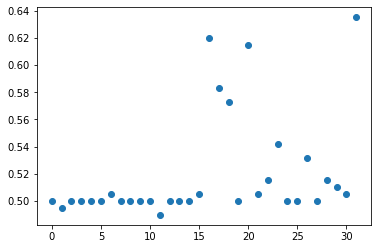

In [34]:
acc = [0.5, 0.4947916666666667, 0.5, 0.5, 0.5, 0.5, 0.5052083333333334, 0.5, 0.5, 0.5, 0.5, 0.4895833333333333, 0.5, 0.5, 0.5, 0.5052083333333334, 0.6197916666666666, 0.5833333333333334, 0.5729166666666666, 0.5, 0.6145833333333334, 0.5052083333333334, 0.515625, 0.5416666666666666, 0.5, 0.5, 0.53125, 0.5, 0.515625, 0.5104166666666666, 0.5052083333333334, 0.6354166666666666]
plt.scatter(range(len(acc)),acc)
plt.savefig("acc_test001.png")

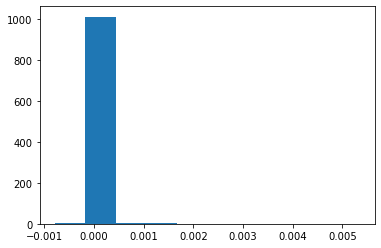

In [35]:
coefs =[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0004893178016504313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0004679744979888516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00179857644149012,0.0015960003271327208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0004887878395415502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0006174513472698656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001634716644817853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00023280201000173154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00011179631533318816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0002781549468942542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005341704840559943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010890996704650893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.51858843486763e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0001539515603575068,-7.395482923576693e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0006064281358549868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000787236315324657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.874599784931617e-05,-7.386277907201032e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0003993046519792527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0007189664155657307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.hist(coefs)
plt.savefig("coefs_combined001.png")